### Phase 4 is about using ML methods and compare with Binary Logistic Regression 

1. Create data partition into train and test data sets ( 80/20) (already done for Logistic Regression)
1. Apply Naïve Bayes Method on train data with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables.   
1. Obtain ROC curve and AUC for train data
1. Obtain Confusion Matrix for train data
1. Obtain ROC curve and AUC for test data
1. Obtain Confusion Matrix for test data
1. Repeat steps 2 to 6 for Decision Tree
1. Repeat steps 2 to 6 for Random Forest Method 
1. Compare AUC for test data in case of 4/5 methods and finalize the method

In [1]:
# Organize imports
import pandas as pd # data manipulation
import numpy as np # numerical operations

from sklearn.model_selection import train_test_split # data splitting

from sklearn.naive_bayes import GaussianNB # for Gaussian Naive Bayes model

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report # model evaluation metrics

import matplotlib.pyplot as plt # plotting
import seaborn as sns # enhanced plotting

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree # decision tree models

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,roc_curve, roc_auc_score # ROC metrics

In [2]:
df = pd.read_csv('markets_with_returns.csv')

# List of market return columns to be used in methods below
independent_vars = [
    'DowJones_Return', 'Nasdaq_Return',
    'HangSeng_Return', 'Nikkei_Return',
    'DAX_Return', 'VIX_Return' ]

# Add Define Nifty_Dir_Open =1/0 based on direction (dependent variable) (already derived in phase 2)
df['Nifty_Dir_Open'] = (df['Nifty_Return'] > 0).astype(int)

In [3]:
# 1 - Create data partition into train and test data sets (80/20)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

# Separate dependent and independent variables
y_train = train_df['Nifty_Dir_Open']
y_test = test_df['Nifty_Dir_Open']
X_train = train_df[independent_vars]
X_test = test_df[independent_vars]

In [4]:
# 2 - Apply Naïve Bayes Method on train data with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables.

# create a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


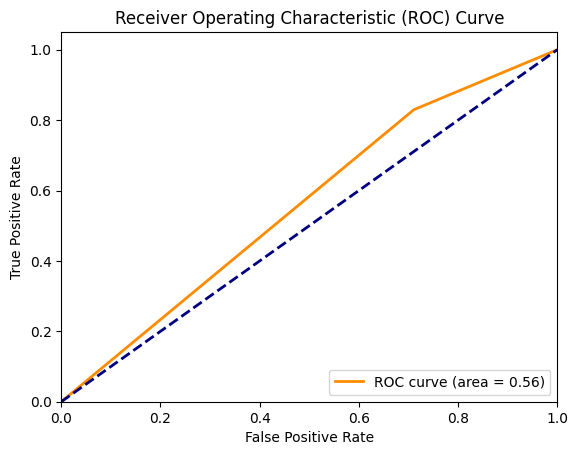

AUC: 0.56


In [ ]:
# 3 - Obtain ROC curve and AUC for train data

# Predict probabilities on the train set and calculate ROC AUC
train_df['predprob_nb'] = nb_model.predict(X_train.astype(int))
fpr, tpr, thresholds = roc_curve(y_train, train_df['predprob_nb'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# # Print AUC
print(f"AUC Naive Bayes - Train dataset: {roc_auc:.2f}")

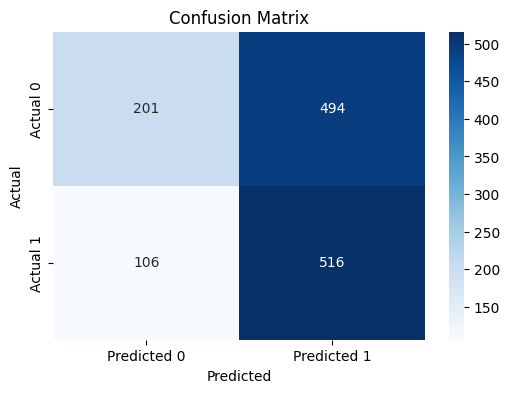

classification report:
               precision    recall  f1-score   support

           0       0.65      0.29      0.40       695
           1       0.51      0.83      0.63       622

    accuracy                           0.54      1317
   macro avg       0.58      0.56      0.52      1317
weighted avg       0.59      0.54      0.51      1317



In [ ]:
# 4 - Obtain Confusion Matrix and Classification Report for train data
cm = confusion_matrix(y_train, train_df['predprob_nb'])
cr = classification_report(y_train, train_df['predprob_nb'])

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("classification report Naive Bayes - Train Dataset:\n", cr)

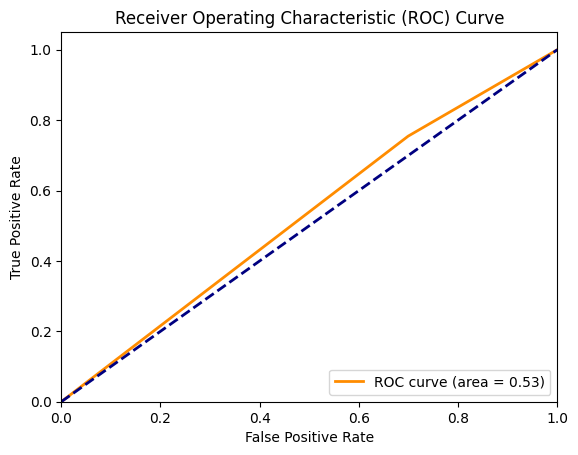

AUC Naive Bayes - Test dataset: 0.53


In [14]:
# 5 - Obtain ROC curve and AUC for test data

# Predict probabilities on the test set and calculate ROC AUC
test_df['predprob_nb'] = nb_model.predict(X_test.astype(int))
fpr, tpr, thresholds = roc_curve(y_test, test_df['predprob_nb'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# # Print AUC
print(f"AUC Naive Bayes - Test dataset: {roc_auc:.2f}")

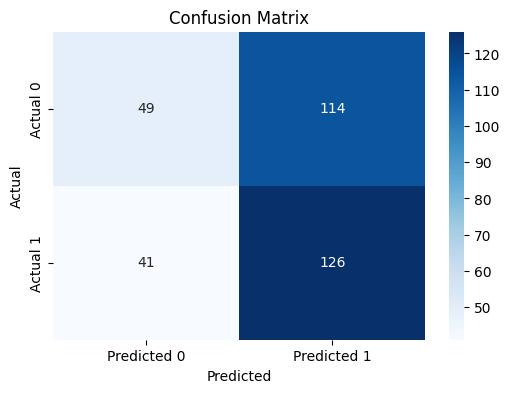

classification report Naive Bayes - Test Dataset:
               precision    recall  f1-score   support

           0       0.54      0.30      0.39       163
           1       0.53      0.75      0.62       167

    accuracy                           0.53       330
   macro avg       0.53      0.53      0.50       330
weighted avg       0.53      0.53      0.50       330



In [13]:
# 4 - Obtain Confusion Matrix and Classification Report for test data
cm = confusion_matrix(y_test, test_df['predprob_nb'])
cr = classification_report(y_test, test_df['predprob_nb'])

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("classification report Naive Bayes - Test Dataset:\n", cr)